# Weather data manipulation and visualization

adapted from [pandas cookbook weather example](http://nbviewer.jupyter.org/github/jvns/pandas-cookbook/blob/v0.1/cookbook/Chapter%205%20-%20Combining%20dataframes%20and%20scraping%20Canadian%20weather%20data.ipynb)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
%matplotlib inline

Figure out URL for downloading weather data a month at a time:

In [2]:
url_template = "http://climate.weather.gc.ca/climateData/bulkdata_e.html?"+ \
"format=csv&stationID={station}&Year={year}&Month={month}&timeframe=1&submit=Download+Data"
## 5415 Hamilton: 27529


fill in information for March 2012, Montreal (station id = 5415):

In [3]:
url = url_template.format(station=5415,month=3, year=2012)
w_montreal_mar2012 = pd.read_csv(url, skiprows=16, index_col='Date/Time', 
                                 parse_dates=True, encoding='latin1')

Using a few extra `read_csv` tricks here:

- `skiprows=16` skips initial rows (metadata/junk)
- `parse_dates` tells `read_csv()` to try to magically detect date and time information (in this case the first 4 columns) and convert it to a `Date/Time` column
- `index_col` specifies up front which column should be used as the index (in this case the magical `Date/Time` column that `read_csv` creates)
-  `encoding='latin1'` specifies the character set to use

In [4]:
w_montreal_mar2012.columns


Index(['Year', 'Month', 'Day', 'Time', 'Data Quality', 'Temp (Â°C)',
       'Temp Flag', 'Dew Point Temp (Â°C)', 'Dew Point Temp Flag',
       'Rel Hum (%)', 'Rel Hum Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag',
       'Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)',
       'Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx',
       'Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather'],
      dtype='object')

In [5]:
w_montreal_mar2012.head()

,Year,Month,Day,Time,Data Quality,Temp (Â°C),Temp Flag,Dew Point Temp (Â°C),Dew Point Temp Flag,Rel Hum (%),...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


plot just temperature (the column name is weird (`"Temp (Â°C)"`) - we'll fix this in a minute)

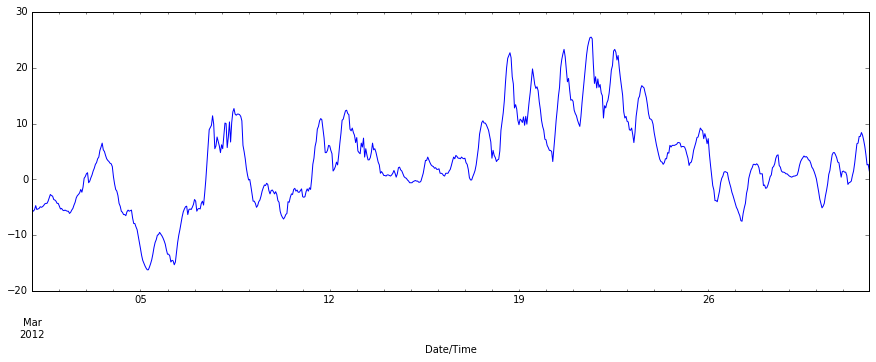

In [6]:
w_montreal_mar2012["Temp (Â°C)"].plot(figsize=(15, 5));

download the same month of data for Hamilton (station ID = 27529)

In [7]:
url2 = url_template.format(station=27529,month=3, year=2012)
w_hamilton_mar2012 = pd.read_csv(url2, skiprows=16, index_col='Date/Time', 
                                 parse_dates=True, encoding='latin1')

plot both together

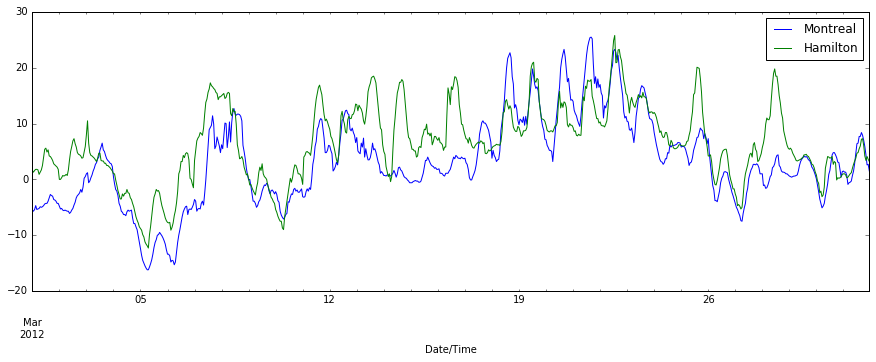

In [8]:
w_montreal_mar2012["Temp (Â°C)"].plot(figsize=(15, 5));
w_hamilton_mar2012["Temp (Â°C)"].plot();
plt.legend(('Montreal','Hamilton'));

## more cleanup

the columns with units in them are going to be a nuisance, so we'll just delete those bits. We could use `re.sub()`, but `pandas` offers a vectorized `.str.replace()` method ... we need to use `\(.*\)` to match parentheses with stuff in them (we need a backslash before the parentheses to indicate that we *really* mean parentheses ...

In [9]:
def replace_cols(x):
    x.columns = x.columns.str.replace(" *\(.*\)","")
    return(x)
w_montreal_mar2012 = replace_cols(w_montreal_mar2012)
w_montreal_mar2012.head()

,Year,Month,Day,Time,Data Quality,Temp,Temp Flag,Dew Point Temp,Dew Point Temp Flag,Rel Hum,...,Wind Spd Flag,Visibility,Visibility Flag,Stn Press,Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,2012,3,1,00:00,,-5.5,NaN,-9.7,NaN,72,...,NaN,4.0,NaN,100.97,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 01:00:00,2012,3,1,01:00,,-5.7,NaN,-8.7,NaN,79,...,NaN,2.4,NaN,100.87,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 02:00:00,2012,3,1,02:00,,-5.4,NaN,-8.3,NaN,80,...,NaN,4.8,NaN,100.80,NaN,NaN,NaN,-13.0,NaN,Snow
2012-03-01 03:00:00,2012,3,1,03:00,,-4.7,NaN,-7.7,NaN,79,...,NaN,4.0,NaN,100.69,NaN,NaN,NaN,-12.0,NaN,Snow
2012-03-01 04:00:00,2012,3,1,04:00,,-5.4,NaN,-7.8,NaN,83,...,NaN,1.6,NaN,100.62,NaN,NaN,NaN,-14.0,NaN,Snow


In [10]:
w_montreal_mar2012.dropna(axis=1, how='any',inplace=True)
w_montreal_mar2012.drop(['Year', 'Month', 'Day', 'Time', 'Data Quality'], axis=1, inplace=True)
w_montreal_mar2012.head()

,Temp,Dew Point Temp,Rel Hum,Wind Spd,Visibility,Stn Press,Weather
Date/Time,,,,,,,
2012-03-01 00:00:00,-5.5,-9.7,72,24,4.0,100.97,Snow
2012-03-01 01:00:00,-5.7,-8.7,79,26,2.4,100.87,Snow
2012-03-01 02:00:00,-5.4,-8.3,80,28,4.8,100.80,Snow
2012-03-01 03:00:00,-4.7,-7.7,79,28,4.0,100.69,Snow
2012-03-01 04:00:00,-5.4,-7.8,83,35,1.6,100.62,Snow


In [11]:
keep_cols = w_montreal_mar2012.columns
keep_cols

Index(['Temp', 'Dew Point Temp', 'Rel Hum', 'Wind Spd', 'Visibility',
       'Stn Press', 'Weather'],
      dtype='object')

In [12]:
def download_weather_month(year=2012, month=1,station=27529):
    if month == 1:
        year += 1
    url = url_template.format(year=year, month=month, station=station)
    weather_data = pd.read_csv(url, skiprows=16, index_col='Date/Time', parse_dates=True)
    weather_data = replace_cols(weather_data)
    weather_data = weather_data[keep_cols]
    return(weather_data)

download_weather_month().head()

,Temp,Dew Point Temp,Rel Hum,Wind Spd,Visibility,Stn Press,Weather
Date/Time,,,,,,,
2013-01-01 00:00:00,-0.2,-5.2,69.0,11.0,NaN,NaN,NaN
2013-01-01 01:00:00,-0.8,-5.9,68.0,7.0,NaN,NaN,NaN
2013-01-01 02:00:00,-1.4,-7.7,62.0,9.0,NaN,NaN,NaN
2013-01-01 03:00:00,-1.7,-8.1,62.0,9.0,NaN,NaN,NaN
2013-01-01 04:00:00,-2.3,-8.1,64.0,11.0,NaN,NaN,NaN


In [13]:
ham_weather = []
for y in range(2012,2017):
    for m in range(1,13):
        print(y,m,end="; ")
        ham_weather.append(download_weather_month(y,m))


2012 1; 2012 2; 2012 3; 2012 4; 2012 5; 2012 6; 2012 7; 2012 8; 2012 9; 2012 10; 2012 11; 2012 12; 2013 1; 2013 2; 2013 3; 2013 4; 2013 5; 2013 6; 2013 7; 2013 8; 2013 9; 2013 10; 2013 11; 2013 12; 2014 1; 2014 2; 2014 3; 2014 4; 2014 5; 2014 6; 2014 7; 2014 8; 2014 9; 2014 10; 2014 11; 2014 12; 2015 1; 2015 2; 2015 3; 2015 4; 2015 5; 2015 6; 2015 7; 2015 8; 2015 9; 2015 10; 2015 11; 2015 12; 2016 1; 2016 2; 2016 3; 2016 4; 2016 5; 2016 6; 2016 7; 2016 8; 2016 9; 2016 10; 2016 11; 2016 12; 

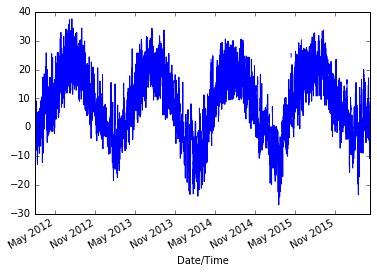

In [14]:
ham_weather_array = pd.concat(ham_weather)               ## stick all of the arrays together
ham_weather_array.dropna(axis=0,how="all",inplace=True)  ## get rid of all-missing rows
ham_weather_array["Temp"].plot();

Last few weeks: `pandas` automatically converts sensible strings into dates, so we can slice that way ...

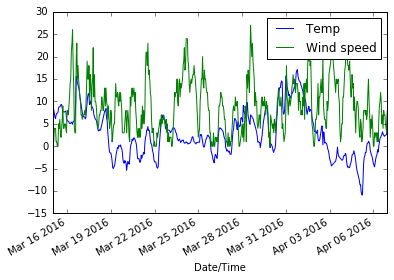

In [15]:
ham_recent = ham_weather_array['20160315':]
ham_recent.Temp.plot();
ham_recent["Wind Spd"].plot()
plt.legend(('Temp','Wind speed'));

## Aggregating

What if we don't want hourly values?  The `.resample()` method works for DataFrames with date-time indices: you can resample to any (see e.g. [here](http://stackoverflow.com/questions/17001389/pandas-resample-documentation)

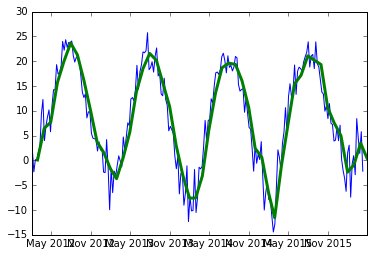

In [16]:
fig, ax = plt.subplots()
## compute weekly averages
ax.plot(ham_weather_array["Temp"].resample("W").mean())
## compute monthly averages
ax.plot(ham_weather_array["Temp"].resample("M").mean())
ax.lines[-1].set_linewidth(3)

(there is a slight difference in the default format between the `pandas` `.plot()` method for Series and DataFrames and the `matplot.pylplot.plot()` function applied to the same data ...)

You might want to *upsample* (i.e., switch to a higher frequency) rather than *downsample* (switch to a lower frequency). Specifying 30-minute periods (`"30T"`) and that we want to fill forward from the last value ...

In [34]:
ham_recent=ham_weather_array["20160406":]["Temp"]
ham_recent_minutes = ham_recent.resample("30T").ffill()
ham_recent_minutes.tail(10)


Date/Time
2016-04-06 18:30:00    2.2
2016-04-06 19:00:00    2.4
2016-04-06 19:30:00    2.4
2016-04-06 20:00:00    2.5
2016-04-06 20:30:00    2.5
2016-04-06 21:00:00    2.5
2016-04-06 21:30:00    2.5
2016-04-06 22:00:00    2.8
2016-04-06 22:30:00    2.8
2016-04-06 23:00:00    7.3
Freq: 30T, Name: Temp, dtype: float64

We might still want the `.groupby().aggregate()` method we used before if we want to average across periods. For example, compute average weekly temperature ...

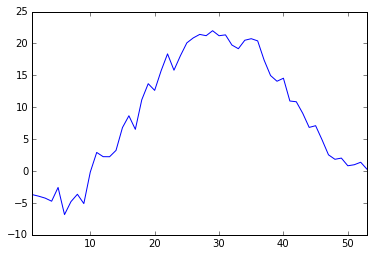

In [17]:
w2 = ham_weather_array["Temp"].groupby(ham_weather_array.index.week)
w3 = w2.aggregate(np.mean)
w3.plot();

I'm not sure why the beginning-of-January and end-of-December lines don't match ...